Project 1 - Τεχνικές Εξόρυξης Δεδομένων - Παπαδόπουλος Χρήστος sdi2000165 - Ηλίας Γεωργίου sdi2000028

In [ ]:
#@title GoogleDrive mount(doesn't work)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title train_2019.csv generator
import pandas as pd

newFileColumns = ['id',
                  'zipcode',
                  'transit',
                  'bedrooms',
                  'beds',
                  'review_scores_rating',
                  'number_of_reviews',
                  'neighbourhood',
                  'name',
                  'latitude',
                  'longitude',
                  'last_review',
                  'instant_bookable',
                  'host_since',
                  'host_response_rate',
                  'host_identity_verified',
                  'host_has_profile_pic',
                  'first_review',
                  'description',
                  'city',
                  'cancellation_policy',
                  'bed_type',
                  'bathrooms',
                  'accommodates',
                  'amenities',
                  'room_type',
                  'property_type',
                  'price',
                  'availability_365',
                  'minimum_nights',
                  'neighbourhood_cleansed',
                  'host_id',
                  'host_name']



##READ FEBRUARY
febList = "../content/drive/MyDrive/AirBnb Data/2019/febrouary/listings.csv"
df1 = pd.read_csv(febList,
                 on_bad_lines='error', usecols=newFileColumns)
df1 = df1.drop_duplicates(subset=['id'], keep='last')
##READ MARCH
marchList = "../content/drive/MyDrive/AirBnb Data/2019/march/listings.csv"
df2 = pd.read_csv(marchList,
                 on_bad_lines='error', usecols=newFileColumns)
df2 = df2.drop_duplicates(subset=['id'], keep='last')
##READ APRIL
aprilList = "../content/drive/MyDrive/AirBnb Data/2019/april/listings.csv"
df3 = pd.read_csv(aprilList,
                 on_bad_lines='error', usecols=newFileColumns)
df3 = df3.drop_duplicates(subset=['id'], keep='last')

##MERGE FILES AND DROP DUPES(KEEP LAST ENTRY)
df = pd.concat([df1, df2, df3])
df = df.drop_duplicates(subset=['id'], keep='last')

#Unspecified for these fields
df[['transit']] = df[['transit']].fillna(value='unspecified')
df[['bed_type']] = df[['bed_type']].fillna(value='unspecified')
df[['description']] = df[['description']].fillna(value='no description')
df[['first_review']] = df[['first_review']].fillna(value='no reviews')
df[['last_review']] = df[['last_review']].fillna(value='no reviews')
df[['number_of_reviews']] = df[['number_of_reviews']].fillna(value=df.number_of_reviews.mean())



#Make host_response_rate equal to mean.
df['host_response_rate'] = df['host_response_rate'].replace('%','',regex=True)
df['host_response_rate'] = df['host_response_rate'].astype(float)
df[['host_response_rate']] = df[['host_response_rate']].fillna(value=df.host_response_rate.mean())

#Same for review_scores_rating
df[['review_scores_rating']] = df[['review_scores_rating']].fillna(value=df.review_scores_rating.mean())


#Filter by set number for these fields
df = df[df.availability_365 < 366]
df = df[df.bathrooms <= 3]
df = df[df.bedrooms <= 6]
df = df[df.beds <= 10]

#Convert price to numeric
df['price'] = df['price'].replace('\$','',regex=True)
df['price'] = df['price'].replace(',','',regex=True)
df['price'] = df['price'].astype(float)
df = df[df.price < 400]

#Anything else empty can be ignored.
df = df.dropna()
df.to_csv(path_or_buf="../content/train_2019.csv", index=False)
print(len(df.index)) # Current is 9854



9854


In [ ]:
#@title train_2023.csv generator
import pandas as pd

newFileColumns = ['id',
                  'bedrooms',
                  'beds',
                  'review_scores_rating',
                  'number_of_reviews',
                  'neighbourhood',
                  'name',
                  'latitude',
                  'longitude',
                  'last_review',
                  'instant_bookable',
                  'host_since',
                  'host_response_rate',
                  'host_identity_verified',
                  'host_has_profile_pic',
                  'first_review',
                  'description',
                  'bathrooms',
                  'accommodates',
                  'amenities',
                  'room_type',
                  'property_type',
                  'price',
                  'availability_365',
                  'minimum_nights',
                  'neighbourhood_cleansed',
                  'host_id',
                  'host_name']



##READ MARCH
marchList = "../content/drive/MyDrive/AirBnb Data/2023/march/listings.csv"
df1 = pd.read_csv(marchList,
                 on_bad_lines='error', usecols=newFileColumns)
df1 = df1.drop_duplicates(subset=['id'], keep='last')
##READ JUNE
juneList = "../content/drive/MyDrive/AirBnb Data/2023/june/listings.csv"
df2 = pd.read_csv(juneList,
                 on_bad_lines='error', usecols=newFileColumns)
df2 = df2.drop_duplicates(subset=['id'], keep='last')
##READ SEPTEMBER
septemberList = "../content/drive/MyDrive/AirBnb Data/2023/september/listings.csv"
df3 = pd.read_csv(septemberList,
                 on_bad_lines='error', usecols=newFileColumns)
df3 = df3.drop_duplicates(subset=['id'], keep='last')

##MERGE FILES AND DROP DUPES(KEEP LAST ENTRY)
df = pd.concat([df1, df2, df3])
df = df.drop_duplicates(subset=['id'], keep='first')

#Unspecified for these fields
df[['description']] = df[['description']].fillna(value='no description')
df[['first_review']] = df[['first_review']].fillna(value='no reviews')
df[['last_review']] = df[['last_review']].fillna(value='no reviews')
df[['number_of_reviews']] = df[['number_of_reviews']].fillna(value=df.number_of_reviews.mean())



#Make host_response_rate equal to mean.
df['host_response_rate'] = df['host_response_rate'].replace('%','',regex=True)
df['host_response_rate'] = df['host_response_rate'].astype(float)
df[['host_response_rate']] = df[['host_response_rate']].fillna(value=df.host_response_rate.mean())

#Same for review_scores_rating
df[['review_scores_rating']] = df[['review_scores_rating']].fillna(value=df.review_scores_rating.mean())

# Bathrooms is empty everywhere, set it to -1.
df[['bathrooms']] = df[['bathrooms']].fillna(value=-1)

#Filter by set number for these fields
df = df[df.availability_365 < 366]
df = df[df.bedrooms <= 6]
df = df[df.beds <= 10]

#Convert price to numeric
df['price'] = df['price'].replace('\$','',regex=True)
df['price'] = df['price'].replace(',','',regex=True)
df['price'] = df['price'].astype(float)
df = df[df.price < 400]

# #Anything else empty can be ignored.
df = df.dropna()
df.sort_values(by=['bathrooms'], ascending=False)
df.to_csv(path_or_buf="../content/train_2023.csv", index=False)
print(len(df.index)) # Current is 7813(12937 before dropna)


7813


In [ ]:
#@title calendar_20XX.csv generator
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Get average price of each day for February
febCal = "../content/drive/MyDrive/AirBnb Data/2019/febrouary/calendar.csv"
dfFeb=pd.read_csv(febCal, usecols=['date', 'price'])
dfFeb.dropna()
dfFeb = dfFeb[dfFeb.date > '2019-01-31']
dfFeb = dfFeb[dfFeb.date < '2019-03-01']

#Convert price to numeric
dfFeb['price'] = dfFeb['price'].replace('\$','',regex=True)
dfFeb['price'] = dfFeb['price'].replace(',','',regex=True)
dfFeb['price'] = dfFeb['price'].astype(float)

dfFeb=dfFeb.groupby('date')['price'].mean()

# Get average price of each day for March
marchCal = "../content/drive/MyDrive/AirBnb Data/2019/march/calendar.csv"
dfMarch=pd.read_csv(marchCal, usecols=['date', 'price'])
dfMarch.dropna()
dfMarch = dfMarch[dfMarch.date > '2019-02-29']
dfMarch = dfMarch[dfMarch.date < '2019-04-01']

#Convert price to numeric
dfMarch['price'] = dfMarch['price'].replace('\$','',regex=True)
dfMarch['price'] = dfMarch['price'].replace(',','',regex=True)
dfMarch['price'] = dfMarch['price'].astype(float)

dfMarch=dfMarch.groupby('date')['price'].mean()

# Get average price of each day for April
aprilCal = "../content/drive/MyDrive/AirBnb Data/2019/april/calendar.csv"
dfApril=pd.read_csv(aprilCal, usecols=['date', 'price'])
dfApril.dropna()
dfApril = dfApril[dfApril.date > '2019-03-31']
dfApril = dfApril[dfApril.date < '2019-05-01']

#Convert price to numeric
dfApril['price'] = dfApril['price'].replace('\$','',regex=True)
dfApril['price'] = dfApril['price'].replace(',','',regex=True)
dfApril['price'] = dfApril['price'].astype(float)

dfApril=dfApril.groupby('date')['price'].mean()

df2019 = pd.concat([dfFeb, dfMarch, dfApril])
df2019.to_csv(path_or_buf="../content/calendar_2019.csv")



# Get average price of each day for March
marchCal = "../content/drive/MyDrive/AirBnb Data/2023/march/calendar.csv"
dfMarch=pd.read_csv(marchCal, usecols=['date', 'price'])
dfMarch.dropna()
dfMarch = dfMarch[dfMarch.date > '2023-02-29']
dfMarch = dfMarch[dfMarch.date < '2023-04-01']

#Convert price to numeric
dfMarch['price'] = dfMarch['price'].replace('\$','',regex=True)
dfMarch['price'] = dfMarch['price'].replace(',','',regex=True)
dfMarch['price'] = dfMarch['price'].astype(float)
dfMarch=dfMarch.groupby('date')['price'].mean()

# Get average price of each day for June
juneCal = "../content/drive/MyDrive/AirBnb Data/2023/june/calendar.csv"
dfJune=pd.read_csv(juneCal, usecols=['date', 'price'])
dfJune.dropna()
dfJune = dfJune[dfJune.date > '2023-05-31']
dfJune = dfJune[dfJune.date < '2023-07-01']

#Convert price to numeric
dfJune['price'] = dfJune['price'].replace('\$','',regex=True)
dfJune['price'] = dfJune['price'].replace(',','',regex=True)
dfJune['price'] = dfJune['price'].astype(float)
dfJune=dfJune.groupby('date')['price'].mean()

# Get average price of each day for September
septCal = "../content/drive/MyDrive/AirBnb Data/2023/september/calendar.csv"
dfSept=pd.read_csv(septCal, usecols=['date', 'price'])
dfSept.dropna()
dfSept = dfSept[dfSept.date > '2023-08-31']
dfSept = dfSept[dfSept.date < '2023-10-01']

#Convert price to numeric
dfSept['price'] = dfSept['price'].replace('\$','',regex=True)
dfSept['price'] = dfSept['price'].replace(',','',regex=True)
dfSept['price'] = dfSept['price'].astype(float)

dfSept=dfSept.groupby('date')['price'].mean()

df2023 = pd.concat([dfMarch, dfJune, dfSept])
df2023.to_csv(path_or_buf="../content/calendar_2023.csv")


<ipython-input-5-47cb4761fa44>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfApril['price'] = dfApril['price'].replace('\$','',regex=True)
<ipython-input-5-47cb4761fa44>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMarch['price'] = dfMarch['price'].replace('\$','',regex=True)
<ipython-input-5-47cb4761fa44>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

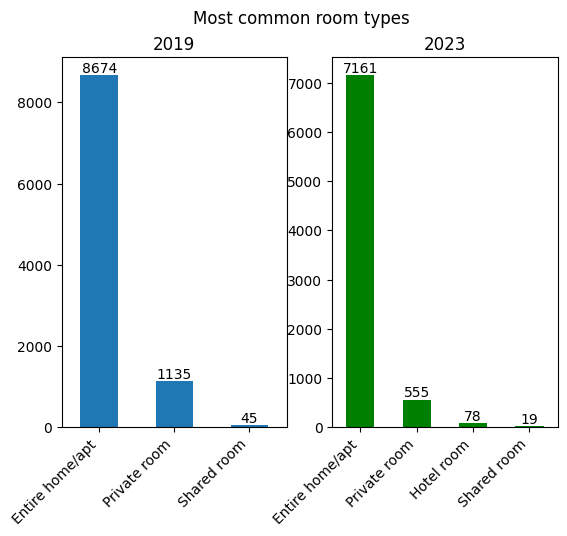

In [ ]:
#@title 1.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019=pd.read_csv("../content/train_2019.csv", usecols=['room_type'])
df2023=pd.read_csv("../content/train_2023.csv", usecols=['room_type'])

plt.suptitle("Most common room types")
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
plot = df2019['room_type'].value_counts().plot(kind='bar', xlabel='', ylabel='', title="2019", legend=False)
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)


plt.subplot(1, 2, 2)
plot = df2023['room_type'].value_counts().plot(kind='bar', xlabel='', ylabel='', title="2023", legend=False, color='green')
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)


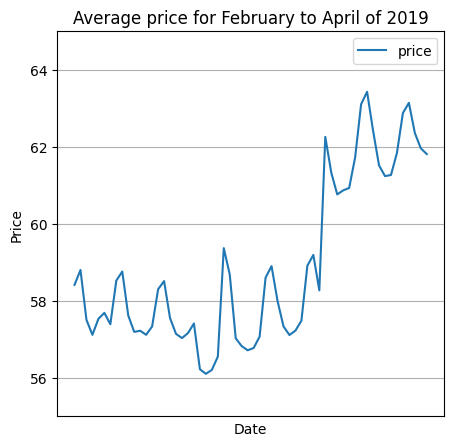

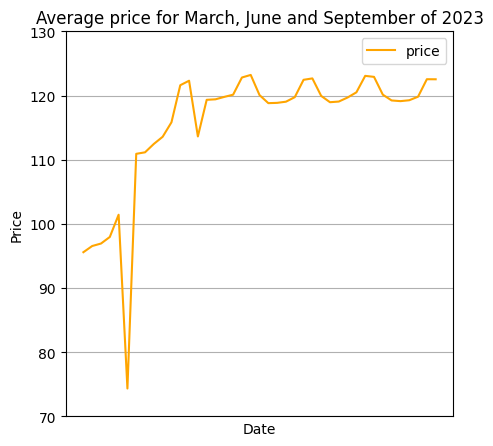

In [ ]:
#@title 1.2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

df2019 = pd.read_csv("../content/calendar_2019.csv")
df2023 = pd.read_csv("../content/calendar_2023.csv")
matplot = df2019.plot(title='Average price for February to April of 2019', ylabel = 'Price',
                      xlabel = 'Date', grid = True, ylim = (55,65),
                      xticks = [], figsize = (5,5))
matplot2 = df2023.plot(title='Average price for March, June and September of 2023', ylabel = 'Price',
                      xlabel = 'Date', grid = True, ylim = (70,130),
                      xticks = [], figsize = (5,5), color ='orange')

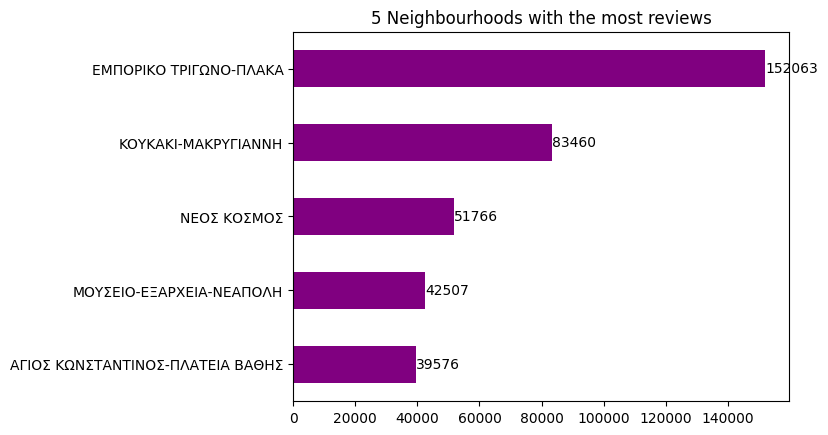

In [ ]:
#@title 1.3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019=pd.read_csv("../content/train_2019.csv", usecols=['neighbourhood_cleansed', 'number_of_reviews'])
#df=df2019['neighbourhood_cleansed'].value_counts()

df2023=pd.read_csv("../content/train_2023.csv", usecols=['neighbourhood_cleansed', 'number_of_reviews'])
#df=df2023['neighbourhood_cleansed'].value_counts()
df=pd.concat([df2019, df2023])
df=df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

df=df.drop_duplicates()


df=df.sort_values(ascending=False)

df=df.head(5)

df=df.sort_values(ascending=True)
plot=df.plot(kind='barh', xlabel='', ylabel='', title='5 Neighbourhoods with the most reviews', legend=False, color='purple')

for container in plot.containers:
  plot.bar_label(container)

In [ ]:
#@title 1.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019=pd.read_csv("../content/train_2019.csv", usecols=['neighbourhood_cleansed'])

df2023=pd.read_csv("../content/train_2023.csv", usecols=['neighbourhood_cleansed'])

merged=pd.concat([df2019,df2023])

df=merged['neighbourhood_cleansed'].value_counts()

################
print("Neighbourhood with the most listings is: ", df.index[0])



Neighbourhood with the most listings is:  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ


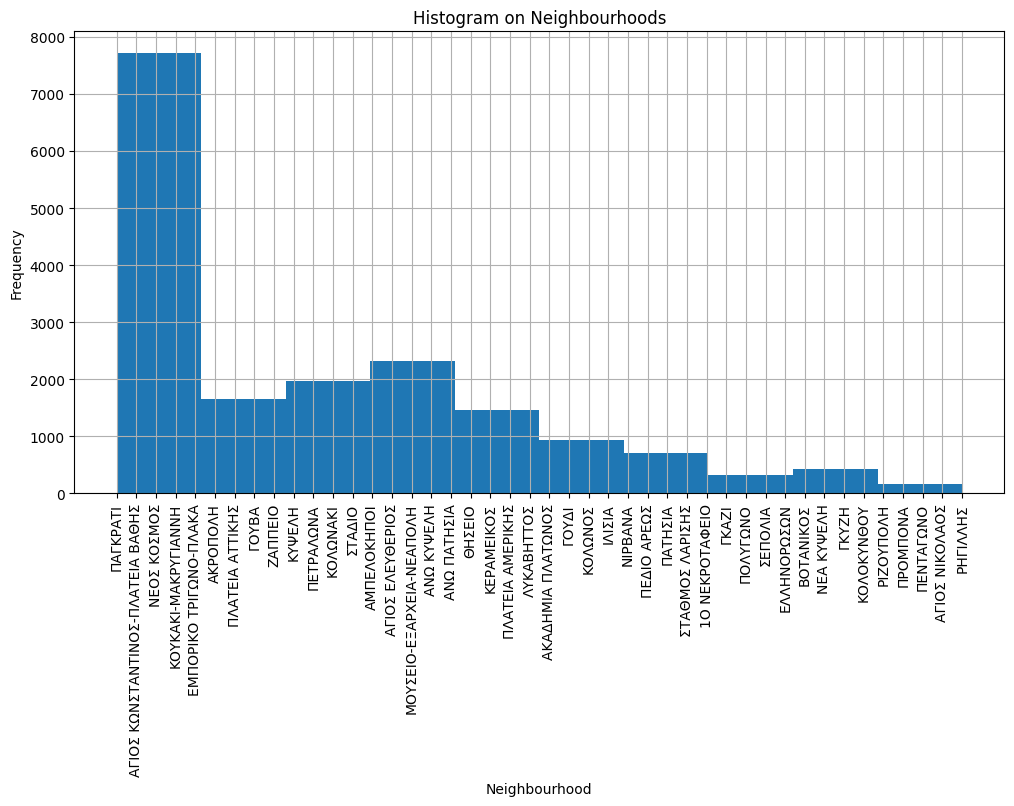

In [ ]:
#@title 1.6
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019=pd.read_csv("../content/train_2019.csv", usecols=['neighbourhood_cleansed'])

df2023=pd.read_csv("../content/train_2023.csv", usecols=['neighbourhood_cleansed'])

merged=pd.concat([df2019,df2023])
plt.figure(figsize=(12,6))
merged['neighbourhood_cleansed'].hist()
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Histogram on Neighbourhoods')
plt.xticks(rotation=90)
plt.show()
#new.to_csv(path_or_buf="../content/test")

In [ ]:
#@title 1.7
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019=pd.read_csv("../content/train_2019.csv", usecols=['neighbourhood_cleansed','room_type'])

df2023=pd.read_csv("../content/train_2023.csv", usecols=['neighbourhood_cleansed','room_type'])

merged=pd.concat([df2019,df2023])

room_counts=merged.groupby(['neighbourhood_cleansed', 'room_type'], as_index=False).value_counts()

#now sort the dataframe by the count of room_type and then we will keep only the first appearence
#of neighbourhood_cleansed names so that we will keep only the most usual room_type for every neighbourhood_cleansed

sorted=room_counts.sort_values(by='count', ascending=False)
final_rooms=sorted.drop_duplicates(subset='neighbourhood_cleansed', keep='first').reset_index()
final_rooms

,index,neighbourhood_cleansed,room_type,count
0,39,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire home/apt,2504
1,65,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire home/apt,1463
2,81,ΝΕΟΣ ΚΟΣΜΟΣ,Entire home/apt,1233
3,76,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,Entire home/apt,1173
4,4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,893
5,86,ΠΑΓΚΡΑΤΙ,Entire home/apt,757
6,15,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,618
7,101,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,Entire home/apt,601
8,12,ΑΚΡΟΠΟΛΗ,Entire home/apt,572
9,58,ΚΟΛΩΝΑΚΙ,Entire home/apt,572


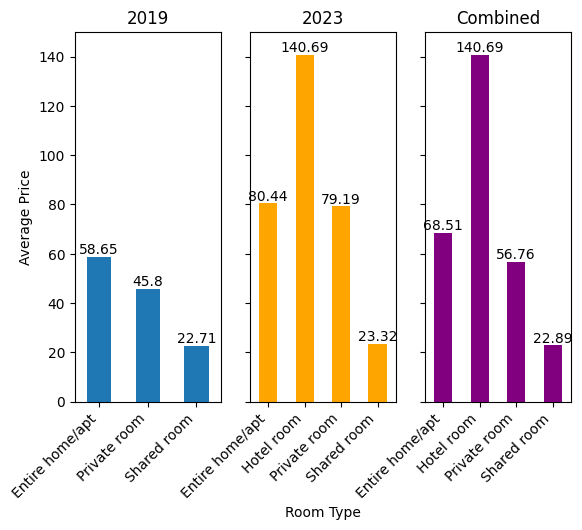

In [ ]:
#@title 1.8
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019=pd.read_csv("../content/train_2019.csv", usecols=['price','room_type'])

df2023=pd.read_csv("../content/train_2023.csv", usecols=['price','room_type'])

dfTotal = pd.concat([df2019, df2023])
df2019 = df2019.groupby('room_type')['price'].mean()
df2023 = df2023.groupby('room_type')['price'].mean()
dfTotal = dfTotal.groupby('room_type')['price'].mean()
df2019 = df2019.round(2)
df2023 = df2023.round(2)
dfTotal = dfTotal.round(2)




plt.subplot(1, 3, 1)  # row 1, column 3, count 1
plot = df2019.plot(kind='bar', xlabel='', ylabel='Average Price', title="2019", legend=False, sharex = True, sharey = True, ylim = (0, 150))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)


plt.subplot(1, 3, 2)
plot = df2023.plot(kind='bar', xlabel='Room Type', ylabel='', title="2023", legend=False, color='orange', sharex = True, sharey = True, ylim = (0, 150))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)

plt.subplot(1, 3, 3)
plot = dfTotal.plot(kind='bar', xlabel='', ylabel='', title="Combined", legend=False, sharex = True, sharey = True,
                    color='purple', ylim = (0, 150))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)




In [ ]:
#@title 1.9
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
df2023 = pd.read_csv("../content/train_2023.csv", usecols=['price', 'id', 'name', 'longitude', 'latitude', 'beds', 'bedrooms', 'accommodates', 'room_type'], nrows = 500, index_col = 'name')

df2023['beds'] = df2023['beds'].astype(str).apply(lambda x: x.replace('.0',''))
df2023['bedrooms'] = df2023['bedrooms'].astype(str).apply(lambda x: x.replace('.0',''))
df2023['price'] = df2023['price'].astype(str).apply(lambda x: x.replace('.0','.00'))
df2023['accommodates'] = df2023['accommodates'].astype(str).apply(lambda x: x.replace('.0',''))
#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''

    my_string = f"""
<style>
    .wide-table {{
        width: 70%;
    }}
    .label-column {{
        width: 30%;
    }}
    .value-column {{
        width: 70%;
    }}
</style>

<table border="1" class="wide-table">
  <tr>
    <td class="label-column"><b>Name:</b></td>
    <td class="value-column">{point.name}</td>
  </tr>
  <tr>
    <td class="label-column"><b>Room Type:</b></td>
    <td class="value-column">{point.room_type}</td>
  </tr>
  <tr>
    <td class="label-column"><b>Price:</b></td>
    <td class="value-column">{point.price}$</td>
  </tr>
  <tr>
    <td class="label-column"><b>Bedrooms:</b></td>
    <td class="value-column">{point.bedrooms}</td>
  </tr>
  <tr>
    <td class="label-column"><b>Beds:</b></td>
    <td class="value-column">{point.beds}</td>
  </tr>
  <tr>
    <td class="label-column"><b>Accommodates:</b></td>
    <td class="value-column">{point.accommodates}</td>
  </tr>
</table>
"""
    folium.Marker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5,
                        popup=my_string, parse_html = True).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df2023.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())


this_map

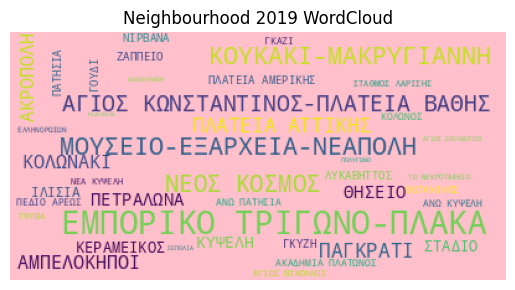

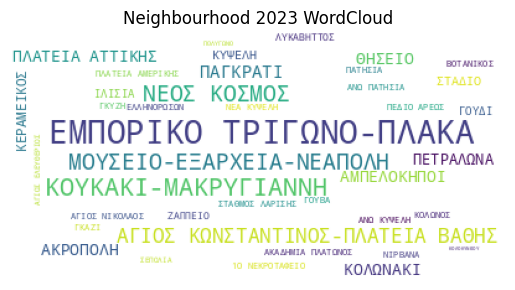

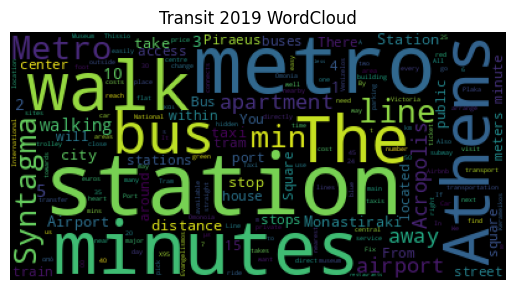

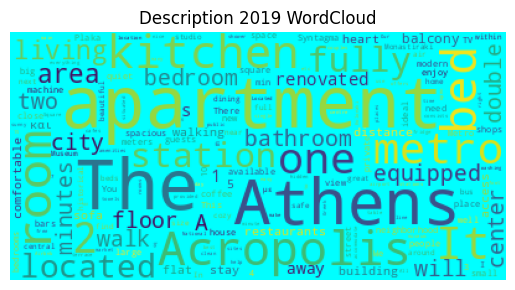

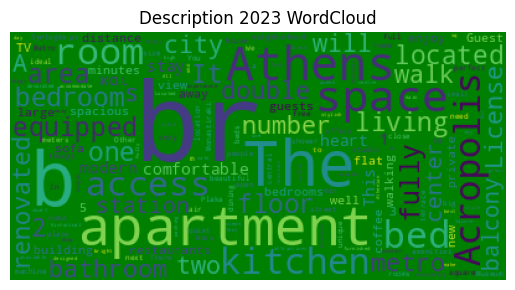

In [ ]:
#@title 1.10
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

df2019 = pd.read_csv("../content/train_2019.csv", usecols=['neighbourhood_cleansed', 'transit', 'description'])
df2023 = pd.read_csv("../content/train_2023.csv", usecols=['neighbourhood_cleansed', 'description'])


text=' '.join(df2019['neighbourhood_cleansed'])
text=df2019['neighbourhood_cleansed'].value_counts().to_dict()
wordcloud2=WordCloud(background_color='pink').generate_from_frequencies(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Neighbourhood 2019 WordCloud")
plt.show()


text=df2023['neighbourhood_cleansed'].value_counts().to_dict()
wordcloud2=WordCloud(background_color='white').generate_from_frequencies(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Neighbourhood 2023 WordCloud")
plt.show()


df2019.drop(df2019[df2019['transit']=='unspecified'].index, inplace=True)
df2019['transit']=df2019['transit'].str.replace('\W', ' ', regex=True)
df2019['transit']=df2019['transit'].str.replace(r'[^\x00-\x7F]+', ' ')

#df2019.to_csv(path_or_buf="../content/test.csv", index=False)
#df2019

text=' '.join(df2019['transit'])
mylist=text.split(' ')


freq = {}
for item in mylist:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1

for item in list(freq):
  if (item in STOPWORDS):
    freq.pop(item)

wordcloud2=WordCloud().generate_from_frequencies(freq)
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Transit 2019 WordCloud")
plt.show()


df2019.drop(df2019[df2019['description']=='no description'].index, inplace=True)
df2019['description']=df2019['description'].str.replace('\W', ' ', regex=True)
df2019['description']=df2019['description'].str.replace(r'[^\x00-\x7F]+', ' ')

text=' '.join(df2019['description'])
mylist=text.split(' ')

freq = {}
for item in mylist:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1

for item in list(freq):
  if (item in STOPWORDS):
    freq.pop(item)


wordcloud2=WordCloud(background_color="cyan").generate_from_frequencies(freq)
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Description 2019 WordCloud")
plt.show()



df2023.drop(df2023[df2023['description']=='no description'].index, inplace=True)
df2023['description']=df2023['description'].str.replace('\W', ' ', regex=True)
df2023['description']=df2023['description'].str.replace(r'[^\x00-\x7F]+', ' ')

text=' '.join(df2023['description'])
mylist=text.split(' ')

freq = {}
for item in mylist:
  if (item in freq):
    freq[item] += 1
  else:
    freq[item] = 1

for item in list(freq):
  if (item in STOPWORDS):
    freq.pop(item)


wordcloud2=WordCloud(background_color="green").generate_from_frequencies(freq)
plt.imshow(wordcloud2)
plt.axis("off")
plt.title("Description 2023 WordCloud")
plt.show()

###############################################################
#last review


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


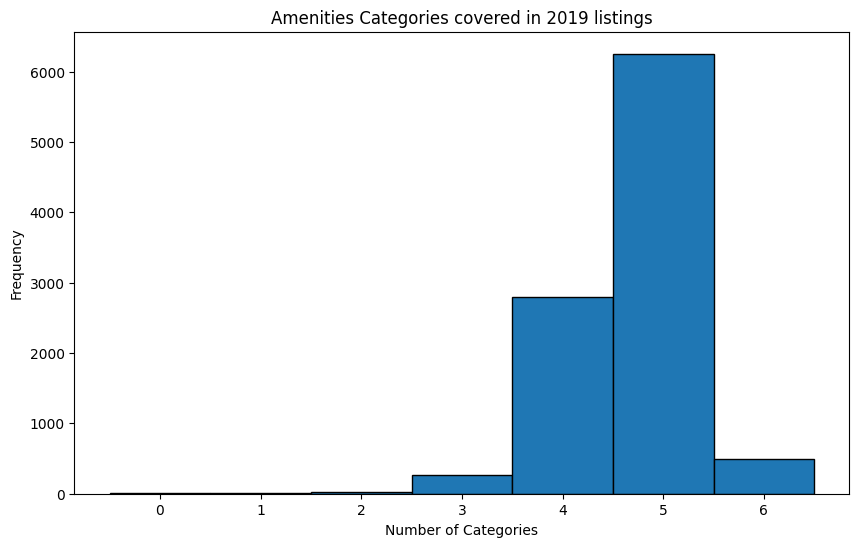

In [ ]:
#@title 1.11
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import nltk
nltk.download('punkt')

kitchen = ['freezer', 'mini_fridge', 'formal_dining_area', 'kitchen_essentials','espresso_machine', 'kettle','grill', 'bbq',
          'bathroom', 'towel','dinnerware', 'dishwasher','breakfast','microwave','coffee_maker','cooking_basics',
          'dishes', 'silverware', 'refrigerator','kitchen',]
bathroom = ['private_bathroom', 'bidet', 'toilet_paper', 'soap','hot_tub','handheld_shower_head', 'shower','bathtub','ethernet',
            'shampoo','hair_dryer', 'hangers',]
tech = ['computer', 'fax_machine', 'dvd_player', 'printer','sound_system', 'netflix', 'game_console','smart_tv','toilet','internet',
        'tv','wifi',]
locationAndSurroundings = ['beachfront','mountain', 'suite', 'view','doorman','beach','garden', 'backyard',]
heatingCoolingQol = ['air_purifier', 'ceiling_fan', 'cooler', 'pool', 'fixed_grab_bars','gym','wheelchair_accessible','24_hour_check_in',
                    'dryer','lit','self_check_in','carbon_monoxide_detector','extra_pillows_and_blankets','host_greets_you',
                    'long_term_stays','fire_extinguisher','first_aid_kit','elevator','laptop_friendly_workspace','parking','heating',
                    'air_conditioning',]
kidsAndPets = ['pets_live_on_this_property','books', 'toys', 'garden', 'children','pets_allowed','patio', 'balcony','kid_friendly',
              'family',]
categories = [kitchen, tech, locationAndSurroundings, heatingCoolingQol, kidsAndPets, bathroom]

mwe = [('air', 'conditioning'), ('dvd', 'player'), ('air', 'purifier'), ('espresso', 'machine'),
          ('coffee', 'maker'), ('first', 'aid', 'kit'), ('wheelchair', 'accessible'), ('cooking', 'basics'), ('dish', 'washer'),
          ('laptop', 'friendly','workspace'), ('hair', 'dryer'), ('pets', 'allowed'),('carbon', 'monoxide','detector'), ('fire', 'detector'),
          ('fire','extinguisher'), ('family', 'friendly'), ('kid', 'friendly'), ('long', 'term', 'stays'), ('host', 'greets', 'you'),
          ('extra', 'pillows', 'and', 'blankets'), ('private', 'bathroom'), ('private', 'room'), ('free', 'wifi'), ('fixed', 'grab', 'bars'),
          ('pets', 'live', 'on', 'this', 'property'), ('smart', 'tv'), ('smart', 'house'), ('game', 'console'), ('beach', 'walk'),
          ('cat', 'friendly'), ('mini', 'fridge'), ('mountain', 'top'), ('fax', 'machine'), ('ceiling', 'fan'),
          ('cleaning', 'before', 'checkout'), ('hot', 'tub'), ('pack', '\'n\'', 'play', 'travel', 'mattress'),
          ('handheld', 'shower', 'head'), ('24', 'hour', 'check', 'in'),
          ('self', 'check', 'in'), ('formal', 'dining', 'area'), ('sound', 'system'), ('toilet', 'paper'), ('kitchen', 'essentials')]


df2019 = pd.read_csv("../content/train_2019.csv", usecols=['amenities'])
df2019['amenities']=df2019['amenities'].str.replace('\W', ' ', regex=True)
df2019['amenities']=df2019['amenities'].str.replace(r'[^\x00-\x7F]+', ' ')
df2019['amenities'] = df2019['amenities'].astype(str)


for index, row in df2019.iterrows():
    text=row['amenities']


    # Tokenize the text into words
    text = text.lower()  # Convert text to lowercase
    words = nltk.word_tokenize(text)

    # Apply the MWETokenizer to the list of words
    mwe_tokenizer = nltk.tokenize.MWETokenizer(mwe)
    tokens = mwe_tokenizer.tokenize(words)
    newAmenity=[]
    for amenity in tokens:
      if amenity in kitchen:
        newAmenity.append('kitchen')
      elif amenity in tech:
        newAmenity.append('tech')
      elif amenity in locationAndSurroundings:
        newAmenity.append('locationAndSurroundings')
      elif amenity in heatingCoolingQol:
        newAmenity.append('heatingCoolingQol')
      elif amenity in kidsAndPets:
        newAmenity.append('kidsAndPets')
      elif amenity in bathroom:
        newAmenity.append('bathroom')

    df2019.at[index, 'amenities'] = set(newAmenity)

# Calculate the length of each list
df2019['amenities_length'] = df2019['amenities'].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df2019['amenities_length'], bins=range(df2019['amenities_length'].max() + 2), align='left', edgecolor='black')
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')
plt.title('Amenities Categories covered in 2019 listings')
plt.xticks(range(df2019['amenities_length'].max() + 1))
plt.show()



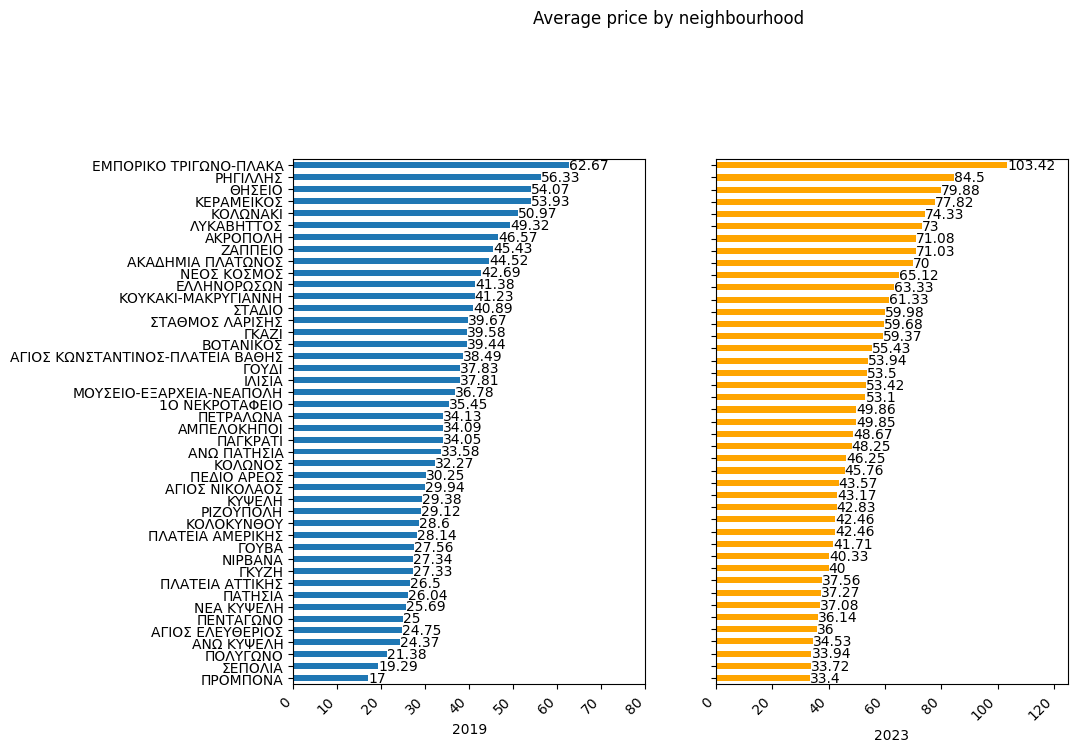

,Neighbourhood,Category
0,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,Cheap
1,ΠΑΤΗΣΙΑ,Cheap
2,ΑΝΩ ΚΥΨΕΛΗ,Cheap
3,ΚΥΨΕΛΗ,Cheap
4,ΓΚΥΖΗ,Cheap
5,ΝΙΡΒΑΝΑ,Cheap
6,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,Cheap
7,ΑΝΩ ΠΑΤΗΣΙΑ,Cheap
8,ΝΕΑ ΚΥΨΕΛΗ,Cheap
9,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Average


In [ ]:
#@title 1.12
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from IPython.display import display

df2019 = pd.read_csv("../content/train_2019.csv", usecols=['neighbourhood_cleansed', 'price', 'accommodates'])
df2023 = pd.read_csv("../content/train_2023.csv", usecols=['neighbourhood_cleansed', 'price', 'accommodates'])

df2019 = df2019[df2019.accommodates == 2]
df2023 = df2023[df2023.accommodates == 2]

df2019 = df2019.groupby('neighbourhood_cleansed')['price'].mean()
df2023 = df2023.groupby('neighbourhood_cleansed')['price'].mean()

df2019 = df2019.sort_values()
df2023 = df2023.sort_values()

df2019 = df2019.round(2)
df2023 = df2023.round(2)

plt.subplot(2, 2, 1)  # row 1, column 2, count 1
plt.suptitle('Average price by neighbourhood')
plt.gca().set_aspect('auto')
plot = df2019.plot(kind='barh', xlabel='2019', ylabel='', legend=False, sharex = True, sharey = True, xlim = (0, 80), figsize = (10,15))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)


plt.subplot(2, 2, 2)
plot = df2023.plot(kind='barh', xlabel='2023', ylabel='', legend=False, color='orange', sharex = True, sharey = True, xlim = (0, 125), figsize = (10,15))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)

CheapNeighbourhoods = []
AverageNeighbourhoods = []
ExpensiveNeighbourhoods = []
for neighbourhood, price in df2023.items():
  if price < 40:
    CheapNeighbourhoods.append(neighbourhood)
  elif price < 70:
    AverageNeighbourhoods.append(neighbourhood)
  else:
    ExpensiveNeighbourhoods.append(neighbourhood)

# Create a new DataFrame with each neighbourhood and its category
all_neighbourhoods = CheapNeighbourhoods + AverageNeighbourhoods + ExpensiveNeighbourhoods
categories = (["Cheap"] * len(CheapNeighbourhoods) +
              ["Average"] * len(AverageNeighbourhoods) +
              ["Expensive"] * len(ExpensiveNeighbourhoods))

categorized_data = pd.DataFrame({'Neighbourhood': all_neighbourhoods, 'Category': categories})
plt.show()
display(categorized_data)


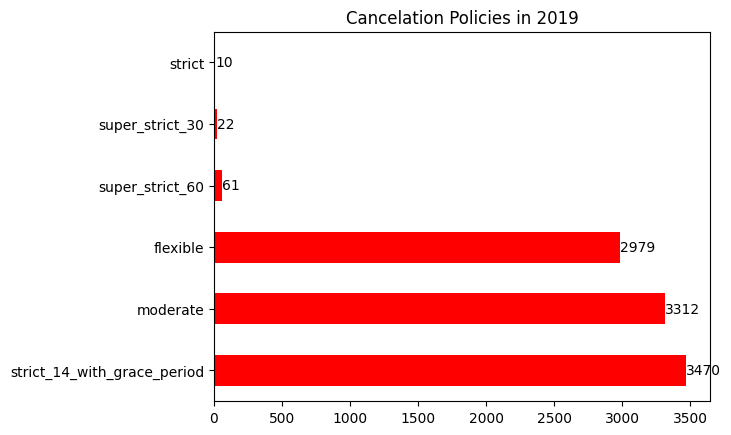

In [ ]:
#@title 1.13.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019 = pd.read_csv("../content/train_2019.csv", usecols=['cancellation_policy', 'availability_365', 'room_type'])

canc_pol=df2019["cancellation_policy"].value_counts()
plot=canc_pol.plot(kind='barh', xlabel='', ylabel='', title='Cancelation Policies in 2019', legend=False, color='red')

for container in plot.containers:
  plot.bar_label(container)

################################################################


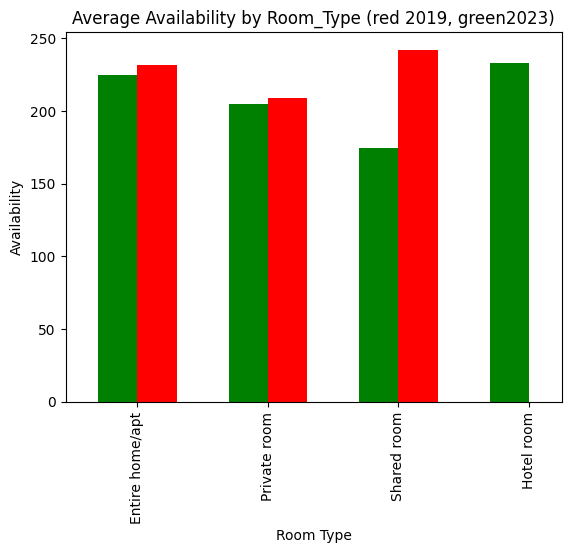

In [ ]:
#@title 1.13.2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2019 = pd.read_csv("../content/train_2019.csv", usecols=['cancellation_policy', 'availability_365', 'room_type'])
df2023 = pd.read_csv("../content/train_2023.csv", usecols=['availability_365', 'room_type'])

av2019=df2019.groupby('room_type')["availability_365"].mean()
av2023=df2023.groupby('room_type')["availability_365"].mean()

av2023=av2023.reindex(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'])
av2019.plot(kind='bar', color='r', position=0, width=0.3)
av2023.plot(kind='bar', color='g', position=1, width=0.3)
plt.xlabel('Room Type')
plt.ylabel('Availability')
plt.title('Average Availability by Room_Type (red 2019, green2023)')
plt.show()



In [ ]:
#@title 1.13.3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2023 = pd.read_csv("../content/train_2023.csv", usecols=['availability_365', 'price', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating'])
df2023=df2023.loc[df2023['availability_365'].isin([0, 1])]
df2023=df2023.mean()

mydata={'Avg Bedrooms':[df2023[0]], 'Avg Beds':[df2023[1]], 'Avg Price':[df2023[2]], 'Avg NumOfReviews':[df2023[4]], 'Avg Rating':[df2023[5]],}
df=pd.DataFrame(mydata)
print("For listings with only 1 or none non-booked days in 2023 we have:\n", df)

For listings with only 1 or none non-booked days in 2023 we have:
    Avg Bedrooms  Avg Beds  Avg Price  Avg NumOfReviews  Avg Rating
0      1.461369   2.10596  68.690949         41.231788    4.702719


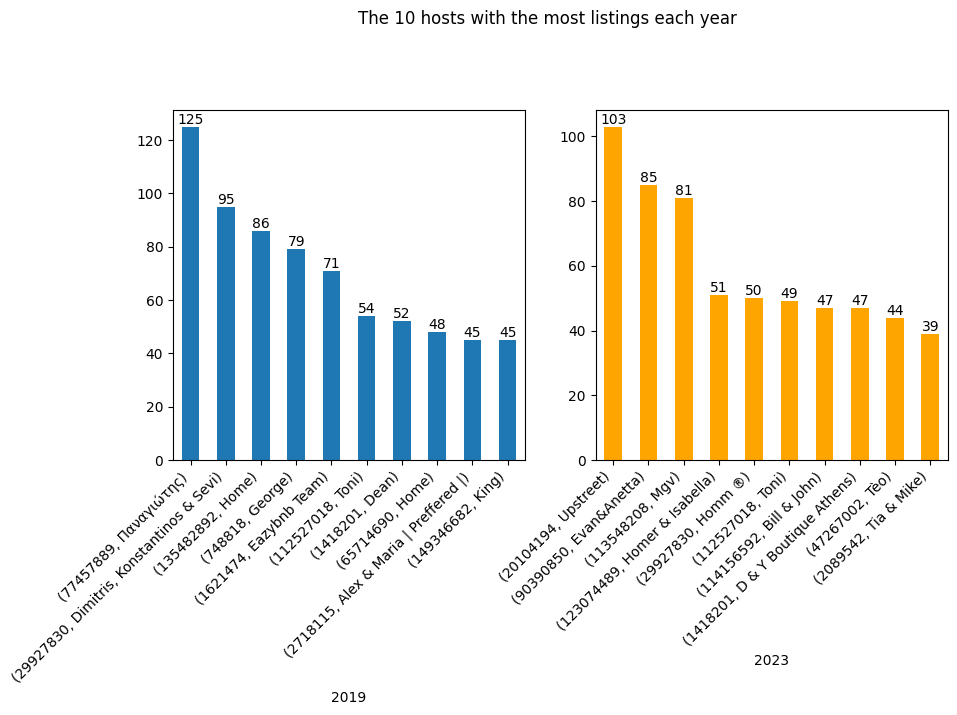

In [ ]:
#@title 1.14
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from IPython.display import display

df2019 = pd.read_csv("../content/train_2019.csv", usecols=['host_id', 'host_name'])
df2023 = pd.read_csv("../content/train_2023.csv", usecols=['host_id', 'host_name'])

df2019 = df2019.groupby('host_id').value_counts()
df2023 = df2023.groupby('host_id').value_counts()

df2019 = df2019.sort_values(ascending=False)
df2023 = df2023.sort_values(ascending=False)

df2019 = df2019.head(10)
df2023 = df2023.head(10)

plt.subplot(2, 2, 1)  # row 1, column 2, count 1
plt.suptitle('The 10 hosts with the most listings each year')
plot = df2019.plot(kind='bar', xlabel='2019', ylabel='', legend=False, sharex = True, figsize=(10,10))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)


plt.subplot(2, 2, 2)
plot = df2023.plot(kind='bar', xlabel='2023', ylabel='', legend=False, color='orange', sharex = True, figsize=(10,10))
plt.xticks(rotation=45, ha='right')
for container in plot.containers:
    plot.bar_label(container)

In [ ]:
#@title 1.15

print("Όπως μπορούμε έυκολα να παρατηρήσουμε από το γράφημα του ερωτήματος 1.2 και 1.12, υπάρχει μια ραγδαία αύξηση των τιμών των listings σε όλες τις περιοχές της Αθήνας\n, από το 2019 στο 2023, \
είτε βρίσκονται στο κέντρο της Αθήνας είτε όχι. Επίσης παρατηρούμε το παράδοξο ότι η μέση τιμή των εκάστοτε γειτονιών δεν διαφέρει σχεσιακά με τις υπόλοιπες, όπως \n \
αυτές παρουσιάζονται στο γράφημα του 2019. Δηλαδή η σειρά που παρουσιάζονται βάση της μέσης τους τιμής δεν αλλάζει. Αυτό σημαίνει ότι οι ακριβές γειτονιές παρέμειναν \n ως οι ακριβές συγκριτικά \
με τις υπόλοιπες ενώ οι φθηνότερες περιοχές παρόλο που οι τιμές των listings τους αθυξήθηκαν. Επίσης από το 1.1 βλέπουμε ότι άρχισαν να γίνονται listings \n και για hotel rooms, ενώ παράλληλα \
έχει μειωθεί κατά ένα βαθμό και ο αριθμός των προσφερόμενων private rooms σε σχέση με το 2019.")

Όπως μπορούμε έυκολα να παρατηρήσουμε από το γράφημα του ερωτήματος 1.2 και 1.12, υπάρχει μια ραγδαία αύξηση των τιμών των listings σε όλες τις περιοχές της Αθήνας
, από το 2019 στο 2023, είτε βρίσκονται στο κέντρο της Αθήνας είτε όχι. Επίσης παρατηρούμε το παράδοξο ότι η μέση τιμή των εκάστοτε γειτονιών δεν διαφέρει σχεσιακά με τις υπόλοιπες, όπως 
 αυτές παρουσιάζονται στο γράφημα του 2019. Δηλαδή η σειρά που παρουσιάζονται βάση της μέσης τους τιμής δεν αλλάζει. Αυτό σημαίνει ότι οι ακριβές γειτονιές παρέμειναν 
 ως οι ακριβές συγκριτικά με τις υπόλοιπες ενώ οι φθηνότερες περιοχές παρόλο που οι τιμές των listings τους αθυξήθηκαν. Επίσης από το 1.1 βλέπουμε ότι άρχισαν να γίνονται listings 
 και για hotel rooms, ενώ παράλληλα έχει μειωθεί κατά ένα βαθμό και ο αριθμός των προσφερόμενων private rooms σε σχέση με το 2019.


In [ ]:
#@title 2setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')


#df2019 = pd.read_csv("../content/train_2019.csv", usecols=['id', 'name', 'description'])
#df2019['description'] = df2019['description'].str.replace(r'<[^<>]*>', '', regex=True)
#df2019['description'] = df2019['description'].str.replace('\W', ' ', regex=True)
#df2019['description'] = df2019['description'].str.replace(r'[^\x00-\x7F]+', ' ', regex=True)
#df2019['description'] = df2019['description'].str.replace('\d+', '', regex=True)
#df2019['description'] = df2019['description'].str.replace('br ', ' ', regex=True)
#df2019['description'] = df2019['description'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

#for index, row in df2019.iterrows():
 #   text=row['description']


    # Tokenize the text into words
  #  text = text.lower()  # Convert text to lowercase
   # words = nltk.word_tokenize(text)


    #filtered_words = [word for word in words if word not in STOPWORDS]



    #df2019.at[index, 'description'] = ' '.join(filtered_words)

#df2019['newCol'] = df2019['name'] + ' ' + df2019['description']
#df0219 = df2019.fillna('NULL')
#df2019.to_csv(path_or_buf='../content/2_2019.csv')

df2023 = pd.read_csv("../content/train_2023.csv", usecols=['id', 'name', 'description'])
df2023['description'] = df2023['description'].str.replace(r'<[^<>]*>', '', regex=True)
df2023['description'] = df2023['description'].str.replace('\W', ' ', regex=True)
df2023['description'] = df2023['description'].str.replace(r'[^\x00-\x7F]+', ' ', regex=True)
df2023['description'] = df2023['description'].str.replace('\d+', ' ', regex=True)
df2023['description'] = df2023['description'].str.replace('br ', ' ', regex=True)
df2023['description'] = df2023['description'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

for index, row in df2023.iterrows():
    text=row['description']


    # Tokenize the text into words
    text = text.lower()  # Convert text to lowercase
    words = nltk.word_tokenize(text)


    filtered_words = [word for word in words if word not in STOPWORDS]



    df2023.at[index, 'description'] = ' '.join(filtered_words)

df2023['newCol'] = df2023['name'] + ' ' + df2023['description']
df2023 = df2023.fillna('NULL')
df2023.to_csv(path_or_buf='../content/2_2023.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#@title 2.1 &2
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df2023 = pd.read_csv("../content/2_2023.csv", usecols=['id','newCol'])

vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = vectorizer.fit_transform(df2023['newCol'])

#print("\nTF-IDF Matrix:")
#print(tfidf_matrix.toarray())


simi_matrix=cosine_similarity(tfidf_matrix)
#print("\nCosine Similarities Matrix", simi_matrix)

low_triangle=np.tril(simi_matrix, k=-1)
#print("\nLow Triangle Matrix", low_triangle)

most_similar=[]
for i in range(low_triangle.shape[0]):
  for j in range(low_triangle.shape[1]):
    if i>j:
      most_similar.append((i,j, low_triangle[i,j]))


most_similar.sort(reverse=True, key = lambda x: x[2])
res_dct = {(most_similar[i][0], most_similar[i][1]): most_similar[i][2] for i in range(0, 100, 1)}

#print(res_dct.keys())
mykeys=[]
print("100 Most Common Listings in 2023:")
for key in res_dct.keys():
  print( ( df2023.loc[key[0]]["id"], df2023.loc[key[1]]["id"] ) )




100 Most Common Listings in 2023:
(832482869847817259, 832464252160294721)
(867843972278062732, 867267820766325309)
(887479103023108284, 41533241)
(929573235170663730, 882322439296329354)
(972871422467200234, 41533241)
(972871422467200234, 887479103023108284)
(22171010, 22030136)
(25207888, 25207595)
(30286826, 30268642)
(30287707, 30284619)
(35413000, 33758895)
(35437358, 35362948)
(36542507, 36541611)
(37530877, 37530292)
(44739815, 44738822)
(50097909, 49671738)
(50143868, 50141259)
(50145565, 50141259)
(50145565, 50143868)
(587444906842088377, 587434872767409048)
(587450388283718605, 587434872767409048)
(587450388283718605, 587444906842088377)
(587461043189673385, 587434872767409048)
(587461043189673385, 587444906842088377)
(587461043189673385, 587450388283718605)
(628019393809182371, 628014578986481086)
(633026694371122347, 631045923653864686)
(633035524832015429, 631045923653864686)
(633035524832015429, 633026694371122347)
(640541027715544609, 628014578986481086)
(640541027715544

In [ ]:
#@title 2.3

#mykeys=[]
#for key in res_dct.keys():
  #mykeys.append(key[1])
 # mykeys.append(key[2])

#lastdf=pd.Dataframe(mykeys)
#lastdf.drop_duplicates(keep=False)

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df2023 = pd.read_csv("../content/2_2023.csv", usecols=['id', 'name','newCol', 'description'])

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df2023['newCol'])

print("Give me a number as the ID of the listing you want!")
listing_id=input()
listing_id=int(listing_id)
while (df2023[df2023['id']==listing_id].empty):
  print("Give a valid number as the ID, *WARNING* the number must match an ID!")
  listing_id=input()
  listing_id=int(listing_id)


print("Now please give me the number (N) of recommended listings you want to see!")
N=input()
while not N.isnumeric():
  print("Give a number")
  N=input()

N=int(N)

indexing=df2023[df2023['id']==listing_id].index[0]

row_tfidf=tfidf_matrix[indexing]

similar=cosine_similarity(row_tfidf.reshape(1, -1), tfidf_matrix)
top_N=similar.argsort()[0][-N-1:][::-1]

print("Recommending", N, "listings similar to:", df2023.loc[df2023['id']==listing_id, 'name'].values[0] )
print("-------------------------------------------------------------------------------")

for index in top_N:
  if index!=(df2023.loc[df2023['id']==listing_id].index[0]):
    print("Recommended: ", df2023.iloc[index]['name'])
    print("Description: ", df2023.iloc[index]['description'])
    print("(score: )", similar[0][index])
    print("\n")

Give me a number as the ID of the listing you want!
33758895
Now please give me the number (N) of recommended listings you want to see!
10
Recommending 10 listings similar to: Athens City Pearl
-------------------------------------------------------------------------------
Recommended:  Athens city Pearl
Description:  athens city pearl conveniently situated near historic center athens km acropolis historic regions plaka monastiraki minutes walking distance megaro mousikis metro station link popular places interest athens two bedroom apartment fully equipped host guests large veranda enjoy amazing city views acropolis athens spaceathens city pearl fifth floor five floor building two bedroom apartment fully equipped host guests spacious living room sofa beds fully equipped kitchen dining area bathroom bathtub wc large veranda amazing city views acropolis athens secure parking garage right next apartment available extra charge feel free contact us need additional information need help pla

In [ ]:
#@title 2.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

df2023 = pd.read_csv("../content/2_2023.csv", usecols=['id', 'name','newCol'])

regex = re.compile('[^a-zA-Z]')
text = ' '.join(df2023['newCol'])
text = text.lower()
text = regex.sub(' ', text)
tokens = nltk.word_tokenize(text)

bigrams = nltk.collocations.BigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#get english stopwords
en_stopwords = set(nltk.corpus.stopwords.words('english'))
#function to filter for ADJ/NN bigrams
def rightTypes(ngram):
    if '-pron-' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords or word.isspace():
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

#filter bigrams by word type
filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
print("The 10 most common bigrams from the descriptions of 2023 listings:")
print(bigramFreqTable[:10])




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


The 10 most common bigrams from the descriptions of 2023 listings:
                     bigram  freq
197          (living, room)  3335
188       (fully, equipped)  3155
212       (license, number)  2270
156        (metro, station)  2245
12            (double, bed)  1959
189     (equipped, kitchen)  1909
357     (walking, distance)  1514
104         (heart, athens)  1370
911        (center, athens)  1278
141716         (in, athina)  1202
